In [1]:
import re, sys, json
import numpy as np
import pandas as pd
from collections import Counter
from numpy.random import rand, randint
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns
from random import uniform
import time
from IPython.display import display, clear_output
from copy import deepcopy

sys.path.append('../lib')

from game import roll_dice, Horse, Stable, ReadySetBetGame, Bet, BettingBoard, get_finish_function, get_expected_payouts

In [4]:
basic_starting_stable = Stable({
    '2/3': Horse(numbers=[2,3], bonus=3, position=0),
    '4': Horse(numbers=[4], bonus=3, position=0),
    '5': Horse(numbers=[5], bonus=2, position=0),
    '6': Horse(numbers=[6], bonus=1, position=0),
    '7': Horse(numbers=[7], bonus=0, position=0),
    '8': Horse(numbers=[8], bonus=1, position=0),
    '9': Horse(numbers=[9], bonus=2, position=0),
    '10': Horse(numbers=[10], bonus=3, position=0),
    '11/12': Horse(numbers=[11,12], bonus=3, position=0),
})


horse_names = ['2/3', '4', '5', '6', '7', '8', '9', '10', '11/12']

In [8]:
# 
# Pause a target simulation and run multiple forward simulations to see what might happen next
#
        
    
###########   ADJUST THESE PARAMETERS   ###########
            
seed(8) # Fix the target simulation

stop_step = 20 # Stop the desired simulation after this number of steps (rolls)

N = 1000 # Number of foward simulations to do 

VERBOSE = False

###################################################






# Start desired simulation
game = ReadySetBetGame()

# Pause desired simulation at stop_step
for i in range(stop_step):
    if i < stop_step-1:
        game.play_step(visualize=False)
    else:
        print('\nPaused State:')
        game.play_step(visualize=True)

current_stable_state = game.stable

logs = []
for i in range(N):
    game = ReadySetBetGame(stable=deepcopy(current_stable_state))
    log = game.play_game(visualize=False, time_step=0.5)
    logs.append(log)

column_order = horse_names

# Store placement info in DataFrame
df_placement = pd.DataFrame([log['placement'] for log in logs])[column_order]

print('\nFinished running simulations.')


Paused State:


Step:20 Roll: 12


      ___________________________________________________
      |  |  |  |  |  |  |  |  |  |  |R |  |  |  |  |FINISH
2/3   ------2/                                     |
4     ---4                                         |
5     ---------------5                             |
6     6                                            |
7     ------------7                                |
8     ---8                                         |
9     ---------------9                             |
10    10                                           |
11/12 ------------11                               |
      |  |  |  |  |  |  |  |  |  |  |R |  |  |  |  |FINISH
      ___________________________________________________

Finished running simulations.


In [9]:
#
# Calculate the expected value for each bet
#

board = BettingBoard()

bet_amount = 3 # Standard chips are 2, 3, 3, 4, 5

expected_payouts = get_expected_payouts(bet_amount, board, logs)

# Display
print('\nBest bets by expected value:\n')
for item in sorted(list(expected_payouts.items()), key=lambda x: x[1], reverse=True):
    print(item)

Import standard bets
{'horse': '2/3', 'won': [[9, -3], [8, -2], [7, -2]], 'placed': [[5, -3], [5, -4]], 'showed': [[4, -3], [4, -4]]}
{'horse': '11/12', 'won': [[9, -3], [8, -2], [7, -2]], 'placed': [[5, -3], [5, -4]], 'showed': [[4, -3], [4, -4]]}
{'horse': '4', 'won': [[7, 0], [6, 0], [5, -1]], 'placed': [[4, 0], [4, -1]], 'showed': [[3, 0], [3, -1]]}
{'horse': '10', 'won': [[7, 0], [6, 0], [5, -1]], 'placed': [[4, 0], [4, -1]], 'showed': [[3, 0], [3, -1]]}
{'horse': '5', 'won': [[5, 0], [4, 0], [4, -2]], 'placed': [[3, -2], [2, -2]], 'showed': [[2, 0], [2, -3]]}
{'horse': '9', 'won': [[5, 0], [4, 0], [4, -2]], 'placed': [[3, -2], [2, -2]], 'showed': [[2, 0], [2, -3]]}
{'horse': '6', 'won': [[3, 0], [3, -1], [3, -2]], 'placed': [[2, -4], [2, -5]], 'showed': [[1, 0], [1, -2]]}
{'horse': '8', 'won': [[3, 0], [3, -1], [3, -2]], 'placed': [[2, -4], [2, -5]], 'showed': [[1, 0], [1, -2]]}
{'horse': '7', 'won': [[3, -2], [3, -3], [3, -4]], 'placed': [[2, -5], [2, -6]], 'showed': [[1, -1], [

In [5]:
#
# Get overall stats - given current positioning of horses
#

Text(0.5, 1.0, 'Placement Outcomes')

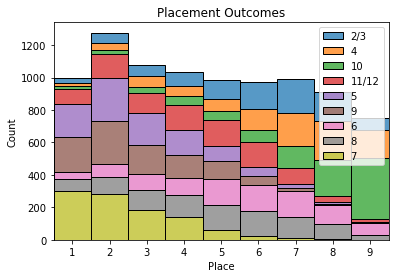

In [6]:
sns.histplot(data=df_placement[['2/3','4','10','11/12','5','9','6','8','7']], 
             multiple="stack", binwidth=1, binrange=[0.5, 10.5])
plt.xlabel('Place')
plt.xlim([0.5, 9.5])
plt.title('Placement Outcomes')


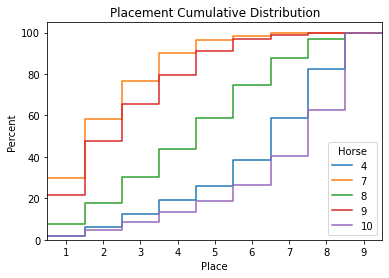

In [7]:
# Placement Cumulative distribution

horse_names_use = ['4', '7', '8', '9', '10'] # Select just the horses you are interested in

for i, name in enumerate(horse_names_use):
    if i==0:
        ax =sns.histplot(data=df_placement[name], binwidth=1, binrange=[.5, 9.5], 
                         element='step', fill=False, stat='percent', label=name, cumulative=True)
    else:
        sns.histplot(ax=ax, data=df_placement[name], binwidth=1, binrange=[.5, 9.5], 
                         element='step', fill=False, stat='percent', label=name, cumulative=True)
    plt.xlabel('Place')
    plt.xlim([.5, 9.5])
    plt.title(f"Placement Cumulative Distribution")
    plt.legend(title='Horse')

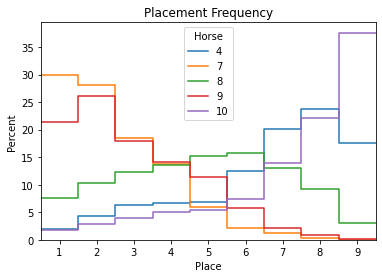

In [8]:
# Placement frequency

for i, name in enumerate(horse_names_use):
    if i==0:
        ax =sns.histplot(data=df_placement[name], binwidth=1, binrange=[.5, 9.5], 
                         element='step', fill=False, stat='percent', label=name)
    else:
        sns.histplot(ax=ax, data=df_placement[name], binwidth=1, binrange=[.5, 9.5], 
                         element='step', fill=False, stat='percent', label=name)
    plt.xlabel('Place')
    plt.xlim([.5, 9.5])
    plt.title(f"Placement Frequency")
    plt.legend(title='Horse')